In [1]:
import os
os.chdir("../../")

import pandas as pd

from src.data_mining.plot_distribution import (
    plot_class_distribution, 
    plot_score_distribution, 
    plot_scatter)
from src.data_mining.word_cloud import (
    create_word_cloud_collage,
    create_contrastive_word_cloud)

In [2]:
import nltk
from nltk.corpus import stopwords
from wordcloud import STOPWORDS

# Download the stopwords from nltk
nltk.download('stopwords')

# Get the English stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(STOPWORDS)
stop_words.update(["said", "say", "report", "article", "year", "people", "day",
                   "says", "say", "said", "reports", "report", "U",
                   "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", 
                   "Saturday"])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shakl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Canada

In [3]:
INPUT_FILE_PATH = r"D:\Studying\UoR\1. Data Mining\Final_Project\data\parsed\canada.csv"

In [4]:
df = pd.read_csv(INPUT_FILE_PATH)
df.shape

(500, 13)

In [5]:
df.source_name.value_counts()

global-news    250
reuters        203
ap              47
Name: source_name, dtype: int64

In [6]:
df.sample(3)

Unnamed: 0         date_publish  \
297        2914  2023-10-31 16:01:04   
488       10180  2023-02-05 12:33:54   
138       12559  2023-09-07 21:28:13   

                                              maintext  \
297  Finance Minister Chrystia Freeland confirmed s...   
488  Canada has deployed a Royal Canadian Air Force...   
138  Veteran Canadian journalist and author Peter C...   

                                                 title    source_type  \
297  Freeland to meet finance ministers on Alberta’...          local   
488  Canada sends long-range patrol aircraft to sup...          local   
138  Canadian journalist and author Peter C. Newman...  international   

     source_name country sentiment_class stance_class  sentiment_score  \
297  global-news  canada         neutral    impartial              0.0   
488  global-news  canada        positive   pro-canada              0.8   
138           ap  canada        positive    impartial              0.8   

     stance_score                                   sentiment_reason  \
297           0.0  The article presents both sides of the issue w...   
488           0.7  The article presents Canada's decision to depl...   
138           0.1  The article presents Peter C. Newman's life an...   

                                         stance_reason  
297  The article's stance is impartial, presenting ...  
488  The article portrays Canada's action as a huma...  
138  The article appears to be reporting on the dea...

In [7]:
plot_class_distribution(df, title="Canadian News Bar Chart", 
                        subtitle="Sentiment and Stance Class Distribution")

In [8]:
plot_score_distribution(df, title="Histogram for Canadian News",
                        subtitle="Sentiment and Stance Score Distribution")

### Relationship Between Sentiment and Stance Scores

In [9]:
plot_scatter(df, title="Scatter Plot for Canadian News", 
             subtitle="Stance score by Sentiment score", width=600)

### Words used

In [10]:
canadian_stopwords = stop_words.copy()
canadian_stopwords.update(["Canada", "Canadian"])

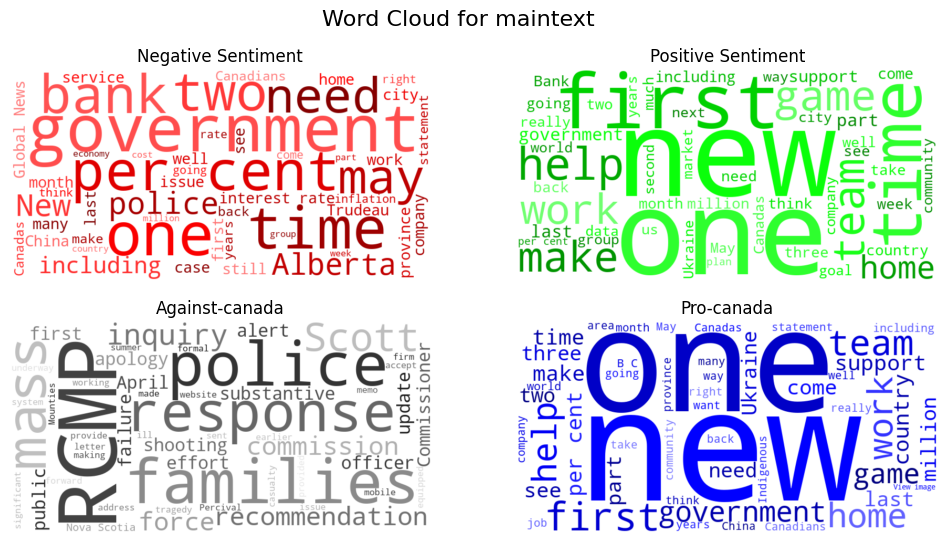

In [11]:
create_word_cloud_collage(df, "maintext", canadian_stopwords, "canada")

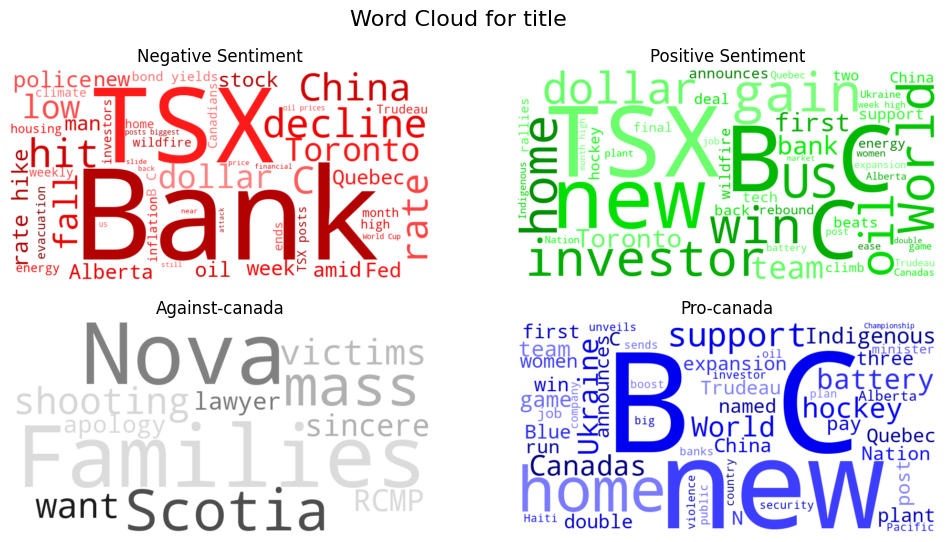

In [12]:
create_word_cloud_collage(df, "title", canadian_stopwords, "canada")

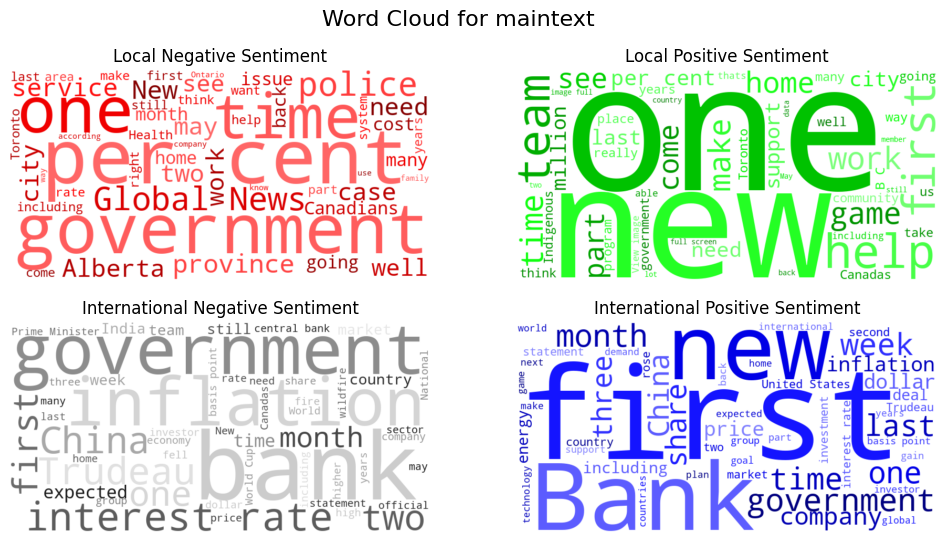

In [13]:
create_contrastive_word_cloud(df, "maintext", canadian_stopwords)

# China

In [14]:
INPUT_FILE_PATH = r"D:\Studying\UoR\1. Data Mining\Final_Project\data\parsed\china.csv"

In [15]:
df = pd.read_csv(INPUT_FILE_PATH)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date_publish      3998 non-null   object 
 1   maintext          4000 non-null   object 
 2   title             4000 non-null   object 
 3   source_type       4000 non-null   object 
 4   source_name       4000 non-null   object 
 5   country           4000 non-null   object 
 6   sentiment_class   4000 non-null   object 
 7   stance_class      4000 non-null   object 
 8   sentiment_score   4000 non-null   float64
 9   stance_score      4000 non-null   float64
 10  sentiment_reason  4000 non-null   object 
 11  stance_reason     4000 non-null   object 
dtypes: float64(2), object(10)
memory usage: 375.1+ KB


In [16]:
df.describe()

sentiment_score  stance_score
count      4000.000000   4000.000000
mean          0.212425      0.163750
std           0.658473      0.362924
min          -1.000000     -0.900000
25%          -0.600000      0.000000
50%           0.000000      0.000000
75%           0.800000      0.200000
max           0.900000      0.900000

In [17]:
df.source_name.value_counts()

reuters        1940
china_daily    1500
ap              560
Name: source_name, dtype: int64

In [18]:
df.head(3)

date_publish                                           maintext  \
0  2018-04-11 00:00:00  Key documents of the third plenary session of ...   
1  2021-06-25 00:00:00  The system of multiparty cooperation and polit...   
2  2020-08-28 00:00:00  the people's police must be loyal to the Party...   

                                               title source_type  source_name  \
0  Key documents on CPC Central Committee plenum ...       local  china_daily   
1  White paper elaborates on China's political pa...       local  china_daily   
2  Senior official stresses stabilizing employmen...       local  china_daily   

  country sentiment_class stance_class  sentiment_score  stance_score  \
0   china        positive    pro-china              0.9           0.8   
1   china        positive    pro-china              0.8           0.7   
2   china        positive    pro-china              0.8           0.7   

                                    sentiment_reason  \
0  The article presents the publication of key do...   
1  The article presents the political party syste...   
2  The article discusses the efforts made by Hu C...   

                                       stance_reason  
0  The article indicates a pro-China stance by hi...  
1  The article appears to take a pro-China stance...  
2  The article presents Hu Chunhua, a senior offi...

In [19]:
plot_class_distribution(df, "Chinese News Bar Chart", 
                        subtitle="Sentiment and Stance Class Distribution")

In [20]:
plot_score_distribution(df, title="Chinese News Histogram",
                        subtitle="Sentiment and Stance Score Distribution")

In [21]:
plot_scatter(df, "Chinese News Scatter Plot", "Stance score by Sentiment score", width=600)

In [22]:
china_stopwords = stop_words.copy()
china_stopwords.update(["China", "Chinese"])

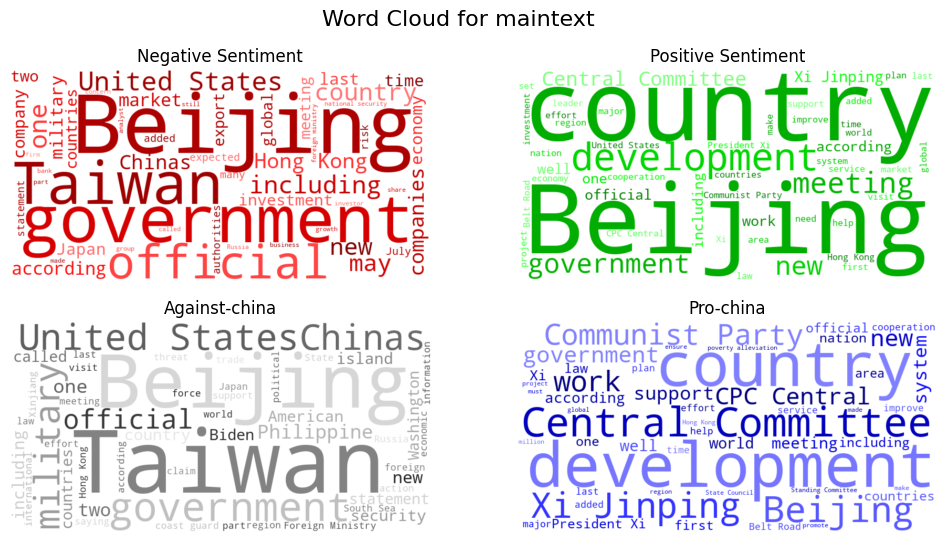

In [23]:
create_word_cloud_collage(df, "maintext", china_stopwords, "china")

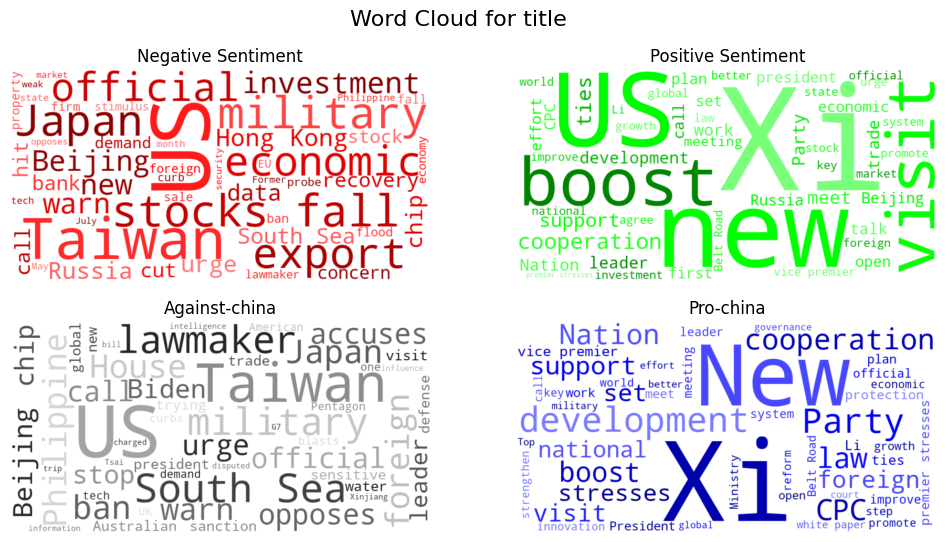

In [24]:
create_word_cloud_collage(df, "title", china_stopwords, "china")

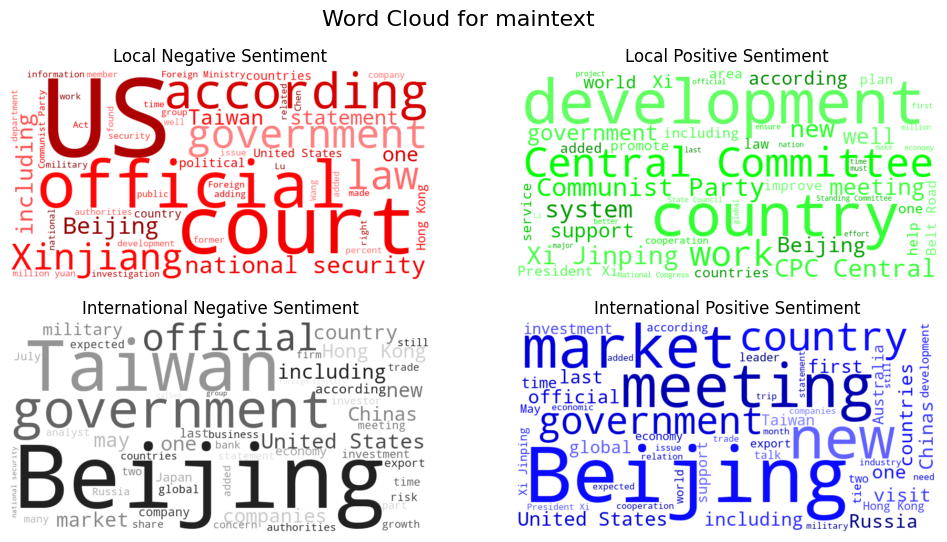

In [25]:
create_contrastive_word_cloud(df, "maintext", china_stopwords)

### Russia

In [26]:
INPUT_FILE_PATH = r"D:\Studying\UoR\1. Data Mining\Final_Project\data\parsed\russia.csv"

In [27]:
df = pd.read_csv(INPUT_FILE_PATH)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date_publish      4000 non-null   object 
 1   maintext          4000 non-null   object 
 2   title             4000 non-null   object 
 3   source_type       4000 non-null   object 
 4   source_name       4000 non-null   object 
 5   country           4000 non-null   object 
 6   sentiment_class   4000 non-null   object 
 7   stance_class      4000 non-null   object 
 8   sentiment_score   4000 non-null   float64
 9   stance_score      4000 non-null   float64
 10  sentiment_reason  4000 non-null   object 
 11  stance_reason     4000 non-null   object 
dtypes: float64(2), object(10)
memory usage: 375.1+ KB


In [28]:
df.describe()

sentiment_score  stance_score
count      4000.000000   4000.000000
mean         -0.345775     -0.149900
std           0.563104      0.385113
min          -1.000000     -1.000000
25%          -0.800000      0.000000
50%          -0.700000      0.000000
75%           0.000000      0.000000
max           0.900000      0.900000

In [29]:
df.source_name.value_counts()

reuters         2141
moscow_times    1500
ap               359
Name: source_name, dtype: int64

In [30]:
df.head(3)

date_publish                                           maintext  \
0  2023-06-13 05:58:03  Ukraine on Monday said it had retaken seven vi...   
1  2023-06-19 21:26:02  U.S. Secretary of State Antony Blinken said on...   
2  2021-07-28 07:13:48  President Alejandro Giammattei announced Tuesd...   

                                               title    source_type  \
0  Ukraine Says 7 Villages Retaken in 'Tough' Off...          local   
1  Blinken urges China's vigilance on its firms p...  international   
2       Guatemala Cancels Order for Russian Vaccines          local   

    source_name country sentiment_class stance_class  sentiment_score  \
0  moscow_times  russia        positive  pro-ukraine              0.8   
1       reuters  russia        negative    impartial             -0.7   
2  moscow_times  russia        negative    impartial             -0.7   

   stance_score                                   sentiment_reason  \
0           0.9  The article conveys a positive sentiment, focu...   
1           0.0  The article presents a negative sentiment, as ...   
2           0.0  The article discusses the cancellation of a pu...   

                                       stance_reason  
0  The article takes a clear stance in favor of U...  
1  The article is reporting on a statement made b...  
2  The article is reporting on a specific event (...

In [31]:
plot_class_distribution(df, "Russian News Bar Chart", 
                        subtitle="Sentiment and Stance Class Distribution")

In [32]:
plot_score_distribution(df, title="Russian News Histogram",
                        subtitle="Sentiment and Stance Score Distribution")

In [33]:
plot_scatter(df, "Russian News Scatter Plot", "Stance score by Sentiment score", width=600)

In [34]:
russia_stopwords = stop_words.copy()
russia_stopwords.update(["Russia", "Russian", "Moscow", "Russias"])

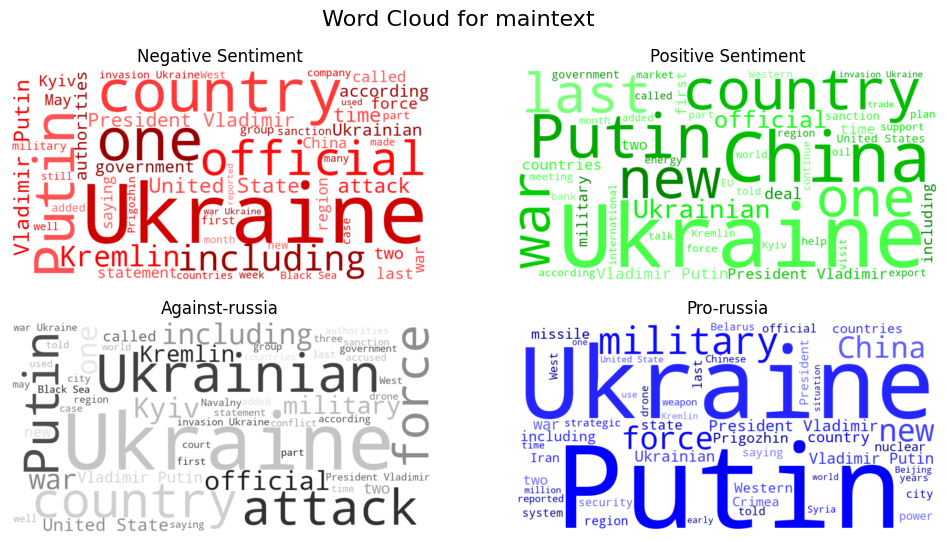

In [35]:
create_word_cloud_collage(df, "maintext", russia_stopwords, "russia")

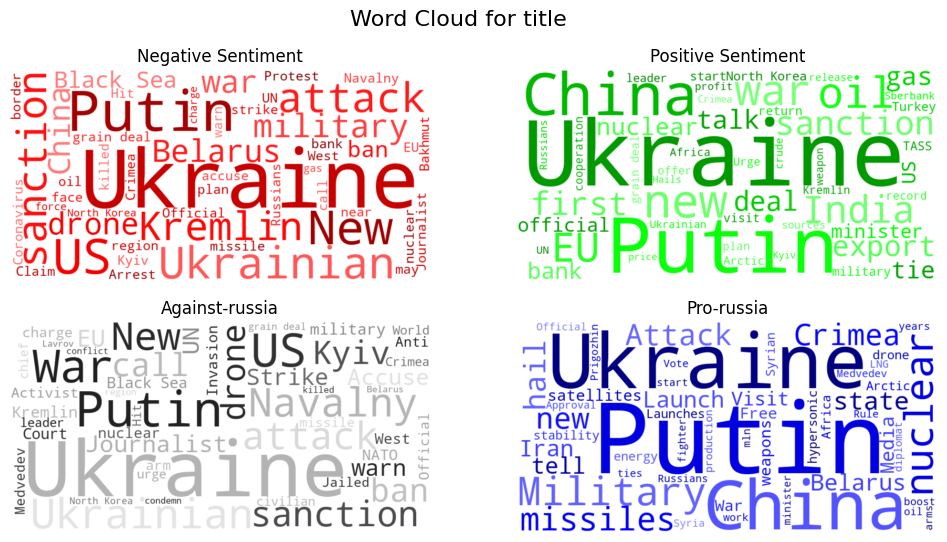

In [36]:
create_word_cloud_collage(df, "title", russia_stopwords, "russia")

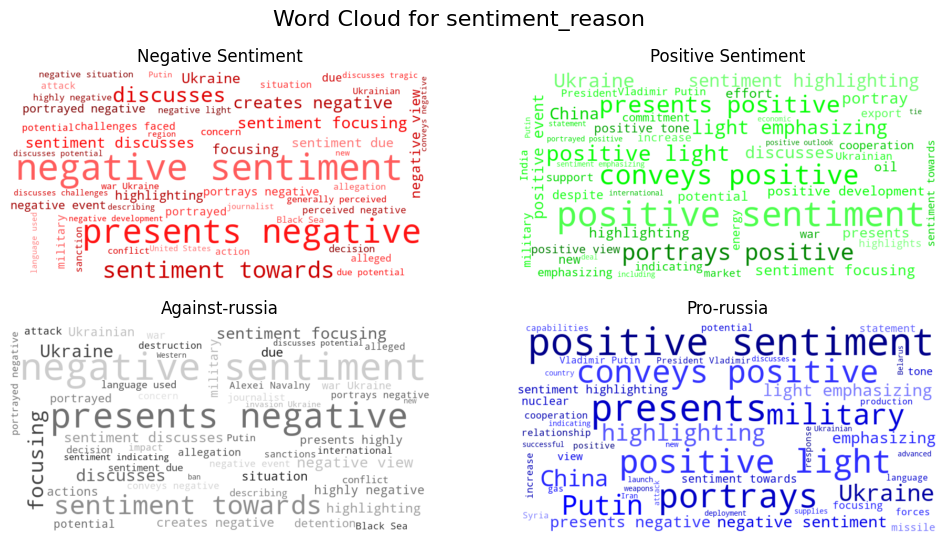

In [37]:
create_word_cloud_collage(df, "sentiment_reason", russia_stopwords, "russia")

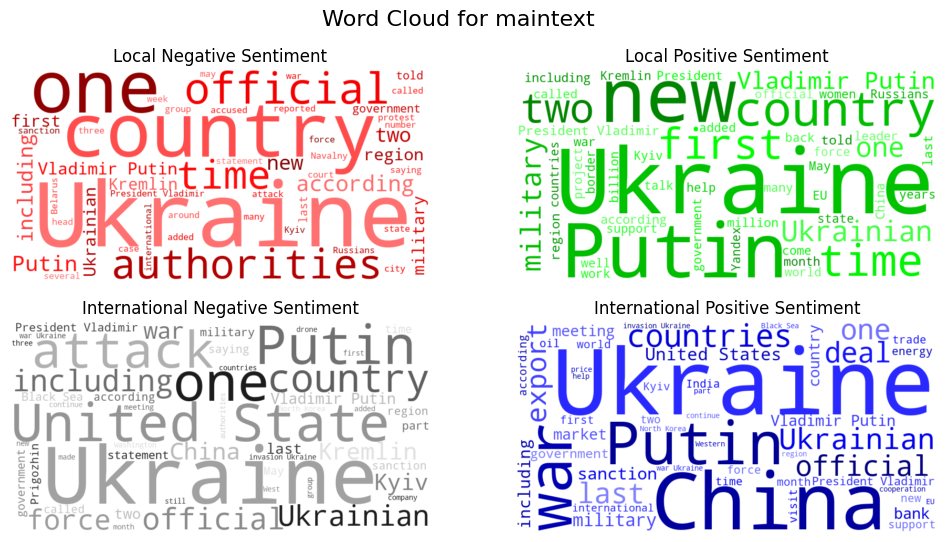

In [38]:
create_contrastive_word_cloud(df, "maintext", russia_stopwords)